In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,LSTM, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from time import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Conv1D, MaxPooling1D, Flatten

In [ ]:
# Function to load data
def load_data(features_dir, labels_dir):
    feature_files = sorted([f for f in os.listdir(features_dir) if not f.startswith('.')])
    label_files = sorted([f for f in os.listdir(labels_dir) if not f.startswith('.')])

    features = []
    labels = []

    for feature_file, label_file in zip(feature_files, label_files):
        feature_data = np.load(os.path.join(features_dir, feature_file))
        label_data = np.load(os.path.join(labels_dir, label_file))

        features.append(feature_data)
        labels.append(label_data)

    features = np.concatenate(features)
    labels = np.concatenate(labels)

    return features, labels


In [ ]:
# Load your data
features_dir = '/content/drive/MyDrive/content/sensor'  # Update path as needed
labels_dir = '/content/drive/MyDrive/content/target'     # Update path as needed
features, labels = load_data(features_dir, labels_dir)

# One-hot encode labels
labels = to_categorical(labels, num_classes=12)

for i in range(2320,2380):
  print(features[i])
  print(labels[i])


[  25.490205   80.       -101.         24.13        0.          0.
    1.         14.404297]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[  25.490205   46.6      -122.         25.32        0.          0.
    0.          8.789062]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 25.098048  20.7      -34.        26.15       0.         0.
   0.         4.150391]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 21.568635  -6.5      -72.        27.22       0.         0.
   0.         0.      ]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 18.039222 -20.8      -32.        27.38       0.         0.
   0.        -2.929688]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 17.254908 -27.9      -19.        29.31       0.         0.
   0.        -4.638672]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 17.254908 -28.6        0.        30.03       0.         0.
   0.        -5.126953]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 16.470594 -27.6        1.        30.65       0.         0.
   0.        -5.126953]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


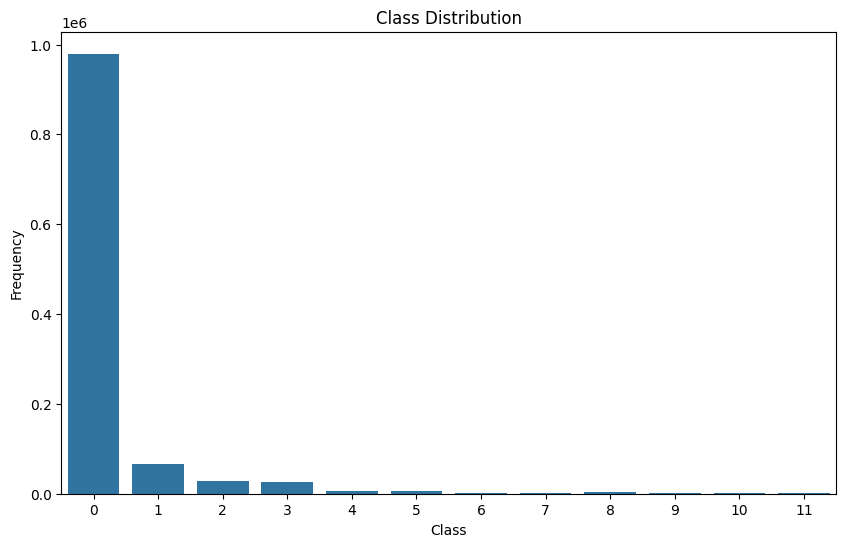

In [ ]:
# Assuming `labels` is a numpy array of shape (n_samples, 12) where each row is a one-hot encoded class label
class_frequencies = np.sum(labels, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(12), y=class_frequencies)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(12))
plt.show()

In [ ]:
# Convert one-hot encoded labels back to categorical labels for stratification
categorical_labels = np.argmax(labels, axis=1)

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    features, categorical_labels,
    test_size=0.2,  # 20% of the data for testing
    random_state=42,  # For reproducibility
    stratify=categorical_labels  # Ensures proportional representation of each class
)

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))


# Convert categorical labels back to one-hot encoding for model training if needed
y_train_one_hot = np.eye(12)[y_train]
y_test_one_hot = np.eye(12)[y_test]

# Now `X_train` and `X_test` are your features for training and testing,
# and `y_train_one_hot` and `y_test_one_hot` are the corresponding one-hot encoded labels.

In [ ]:
for i in range(2350,2380):
  print(X_train_reshaped[i])
  print(y_train_one_hot[i])

[[ 9.019611  2.       16.       52.76      0.        0.        0.
  -0.732422]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 0.00000e+00 -1.50000e+00  0.00000e+00  0.00000e+00  1.38968e+03
   0.00000e+00  0.00000e+00 -4.88281e-01]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 0.00000e+00 -5.70000e+00  0.00000e+00  9.83000e+00  9.34440e+02
   0.00000e+00  0.00000e+00 -2.44141e-01]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 0.00000e+00 -3.60000e+00 -1.00000e+00  0.00000e+00  1.79700e+03
   0.00000e+00  0.00000e+00 -2.44141e-01]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[  0.       182.8       56.         8.11     359.4        0.
    1.         9.033203]]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 0.        3.1      -3.       26.87      0.        0.        0.
   0.732422]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 0.       47.3       0.        0.        0.        0.        0.
  -0.244141]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 24.313734 -15.3       -3.        78.83       0.         0.
    0.        

In [ ]:
model = Sequential()

model.add(LSTM(256, input_shape=(1, 8)))  # 1 time step, 8 features

model.add(Dense(128, activation='relu'))

# Output layer for 12 classes with softmax activation
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto')
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_reshaped, y_train_one_hot,
    validation_split=0.2,  # using 20% of the training data for validation
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/50
44936/44936 [==============================] - 524s 12ms/step - loss: 0.3860 - accuracy: 0.8910 - val_loss: 0.3813 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 2/50
44936/44936 [==============================] - 477s 11ms/step - loss: 0.3702 - accuracy: 0.8929 - val_loss: 0.3730 - val_accuracy: 0.8931 - lr: 0.0010
Epoch 3/50
27074/44936 [=================>............] - ETA: 2:55 - loss: 0.3655 - accuracy: 0.8937

KeyboardInterrupt: 

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(256, input_shape=(1, 8)))  # 1 time step, 8 features

lstm_model.add(Dense(128, activation='relu'))

# Output layer for 12 classes with softmax activation
lstm_model.add(Dense(12, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lstm_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto')
lstm_early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Train the model
lstm_history = lstm_model.fit(
    X_train_reshaped, y_train_one_hot,
    validation_split=0.2,  # using 20% of the training data for validation
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=[lstm_reduce_lr, lstm_early_stop]
)


Epoch 1/15
11234/11234 [==============================] - 168s 15ms/step - loss: 0.3788 - accuracy: 0.8918 - val_loss: 0.3600 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 2/15
11234/11234 [==============================] - 174s 15ms/step - loss: 0.3583 - accuracy: 0.8943 - val_loss: 0.3571 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 3/15
11234/11234 [==============================] - 168s 15ms/step - loss: 0.3527 - accuracy: 0.8949 - val_loss: 0.3567 - val_accuracy: 0.8954 - lr: 0.0010
Epoch 4/15
11234/11234 [==============================] - 168s 15ms/step - loss: 0.3516 - accuracy: 0.8955 - val_loss: 0.3563 - val_accuracy: 0.8962 - lr: 0.0010
Epoch 5/15
11234/11234 [==============================] - 169s 15ms/step - loss: 0.3502 - accuracy: 0.8957 - val_loss: 0.3490 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 6/15
11234/11234 [==============================] - 166s 15ms/step - loss: 0.3478 - accuracy: 0.8961 - val_loss: 0.3496 - val_accuracy: 0.8968 - lr: 0.0010
Epoch 7/15
11234/11234 [====

KeyboardInterrupt: 

In [ ]:
bi_lstm_model = Sequential()

# Add a Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(256), input_shape=(1, 8)))

# Add a Dense layer with ReLU activation
bi_lstm_model.add(Dense(128, activation='relu'))

# Output layer for 12 classes with softmax activation
bi_lstm_model.add(Dense(12, activation='softmax'))

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto')
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)

import time
start_time = time.time()
# Train the model
bi_lstm_history = model.fit(
    X_train_reshaped, y_train_one_hot,
    validation_split=0.2,  # using 20% of the training data for validation
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=[reduce_lr, early_stop]
)
end_time = time.time()
training_time = end_time - start_time

#CSV Logger

Epoch 1/15
11234/11234 [==============================] - 168s 15ms/step - loss: 0.3663 - accuracy: 0.8933 - val_loss: 0.3537 - val_accuracy: 0.8943 - lr: 0.0010
Epoch 2/15
11234/11234 [==============================] - 147s 13ms/step - loss: 0.3551 - accuracy: 0.8945 - val_loss: 0.3508 - val_accuracy: 0.8963 - lr: 0.0010
Epoch 3/15
11234/11234 [==============================] - 161s 14ms/step - loss: 0.3519 - accuracy: 0.8952 - val_loss: 0.3552 - val_accuracy: 0.8960 - lr: 0.0010
Epoch 4/15
11232/11234 [============================>.] - ETA: 0s - loss: 0.3512 - accuracy: 0.8955
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11234/11234 [==============================] - 161s 14ms/step - loss: 0.3512 - accuracy: 0.8955 - val_loss: 0.3514 - val_accuracy: 0.8963 - lr: 0.0010
Epoch 5/15
11234/11234 [==============================] - 159s 14ms/step - loss: 0.3380 - accuracy: 0.8977 - val_loss: 0.3384 - val_accuracy: 0.8984 - lr: 1.0000e-04
Epoch 6/15
11234/112

In [ ]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
import time
# Start the timer
start_time = time.time()
# Predict the probabilities for the test data
y_pred_probs = model.predict(X_test_reshaped)
# Stop the timer
end_time = time.time()
testing_time = end_time - start_time

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Calculate precision, recall, and f1-score
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_one_hot)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')


# Print the metrics
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Testing Time: {testing_time} seconds")

7022/7022 [==============================] - 32s 4ms/step - loss: 0.3333 - accuracy: 0.8985


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.33330613374710083
Test Accuracy: 0.8985085487365723
Precision: 0.8742026764686015
Recall: 0.8985085388487576
F1-Score: 0.875100517119682
Testing Time: 35.0097918510437 seconds


In [ ]:
report = classification_report(y_test, y_pred, target_names=[f"Class {i}" for i in range(12)])
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.91      0.98      0.95    195913
     Class 1       0.59      0.15      0.24     13341
     Class 2       0.76      0.61      0.68      5767
     Class 3       0.78      0.62      0.69      5204
     Class 4       0.58      0.15      0.23      1182
     Class 5       0.62      0.14      0.22      1120
     Class 6       0.30      0.05      0.08       454
     Class 7       0.00      0.00      0.00       208
     Class 8       0.00      0.00      0.00       559
     Class 9       0.00      0.00      0.00       142
    Class 10       0.00      0.00      0.00       302
    Class 11       0.57      0.25      0.35       487

    accuracy                           0.90    224679
   macro avg       0.43      0.25      0.29    224679
weighted avg       0.87      0.90      0.88    224679



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn_lstm_model = Sequential()

# Convolutional layer without max pooling
cnn_lstm_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 1, 8)))
cnn_lstm_model.add(TimeDistributed(Flatten()))

# LSTM layer
cnn_lstm_model.add(LSTM(256))

cnn_lstm_model.add(Dense(128, activation='relu'))

# Output layer for 12 classes with softmax activation
cnn_lstm_model.add(Dense(12, activation='softmax'))

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
cnn_lstm_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto')
cnn_lstm_early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Train the model
cnn_lstm_history = cnn_lstm_model.fit(
    X_train_reshaped, y_train_one_hot,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=[cnn_lstm_reduce_lr, cnn_lstm_early_stop]
)

Epoch 1/15


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, None, 1, 8), found shape=(None, 1, 8)


In [ ]:
# Visualize the training results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()